In [1]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def filter_for_plotting(M, fc, window_type, fs):
    
    b = signal.firwin(M,
                      cutoff=fc,
                      window=window_type,
                      fs=fs)
    
    w, h = signal.freqz(b,1)
    f = rad_to_hertz(w, fs)
    
    #w_normalized = normalize_rad(w)
    
    h_dB = 20 * np.log10(np.abs(h))
    h_Phase = np.unwrap(np.arctan2(np.imag(h), np.real(h)))
    
    return f, h_dB, h_Phase

def rad_to_hertz(w, fs):
    
    return (w*fs) / (2*np.pi)

#def hertz_to_rad(f, fs):
    
#    w = 

def normalize_rad(w):
    """
    assumes max(w) = pi
    """
    return w/max(w)

def plot_single_filter(M, fc, window_type, fs, save=''):
    
    f, h_dB, h_Phase = filter_for_plotting(M, fc, window_type, fs)

    fig, ax = plt.subplots(nrows=2, figsize=(15,8), constrained_layout=True, sharex=True)

    fig.suptitle('Frequency and Phase Response of {} window filter with M={}'.format(window_type, M))

    ax[0].plot(f, h_dB)
    ax[0].vlines(fc, -90, 0, color='r')
    ax[0].set_ylim(min(h_dB), 5)
    ax[0].set_ylabel('Magnitude (db)')
    ax[0].set_xlabel('Frequency (Hz)')
    ax[0].set_title('Frequency response')
    ax[0].set_xlim([-0.01, max(f)])

    ax[1].plot(f,h_Phase)
    ax[1].vlines(fc, min(h_Phase), max(h_Phase), color='r')
    ax[1].set_ylabel('Phase (radians)')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_title('Phase response')
    ax[1].set_xlim([-0.01, max(f)])
    
    if save:
        plt.savefig(save)
        
    plt.show()
    
def plot_multiple_filters(M, fc, fs, save=''):
    
    typ1, typ2, typ3, typ4, typ5 = 'boxcar hamming hann blackman bartlett'.split(' ')
    
    f1, h_dB1, h_Phase1 = filter_for_plotting(M, fc, typ1, fs)
    f2, h_dB2, h_Phase2 = filter_for_plotting(M, fc, typ2, fs)
    f3, h_dB3, h_Phase3 = filter_for_plotting(M, fc, typ3, fs)
    f4, h_dB4, h_Phase4 = filter_for_plotting(M, fc, typ4, fs)
    f5, h_dB5, h_Phase5 = filter_for_plotting(M, fc, typ5, fs)

    fig, ax = plt.subplots(nrows=3, figsize=(15,12), constrained_layout=True)

    fig.suptitle('Frequency and Phase Responses of Filters with M={}'.format(M))

    ax[0].plot(f1, h_dB1, label=typ1)
    ax[0].plot(f2, h_dB2, label=typ2)
    ax[0].plot(f3, h_dB3, label=typ3)
    ax[0].plot(f4, h_dB4, label=typ4)
    #ax[0].plot(f5, h_dB5, label=typ5)
    ax[0].vlines(fc, np.concatenate([h_dB1,h_dB2,h_dB3,h_dB4]).min(), 0, color='r', label='cutoff')
    ax[0].set_ylabel('Magnitude (db)')
    ax[0].set_xlabel('Frequency (Hz)')
    ax[0].set_title('Frequency response')
    ax[0].set_xlim([-0.01, max(f1)])
    ax[0].legend(loc=1)
    
    ax[1].plot(f1, h_dB1, label=typ1)
    ax[1].plot(f2, h_dB2, label=typ2)
    ax[1].plot(f3, h_dB3, label=typ3)
    ax[1].plot(f4, h_dB4, label=typ4)
    #ax[0].plot(f5, h_dB5, label=typ5)
    ax[1].vlines(fc, -120, 0, color='r', label='cutoff')
    ax[1].set_ylim(-90, 5)
    ax[1].set_ylabel('Magnitude (db)')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_title('Frequency response')
    ax[1].set_xlim([-0.01, 3*fc])
    ax[1].legend(loc=1)

    ax[2].plot(f1, h_Phase1, label=typ1)
    ax[2].plot(f2, h_Phase2, label=typ2)
    ax[2].plot(f3, h_Phase3, label=typ3)
    ax[2].plot(f4, h_Phase4, label=typ4)
    #ax[1].plot(f5, h_Phase5, label=typ5)
    ax[2].vlines(fc, np.concatenate([h_Phase1,h_Phase2,h_Phase3,h_Phase4]).min(), 0, color='b', label='cutoff')
    ax[2].set_ylabel('Phase (radians)')
    ax[2].set_xlabel('Frequency (Hz)')
    ax[2].set_title('Phase response')
    ax[2].set_xlim([-0.01, 3*fc])
    ax[2].legend(loc=1)
    
    if save:
        plt.savefig(save)
        
    plt.show()

## Single Window Type

In [ ]:
fs = 44100
fc = 150 # cutoff in Hz

#M1 = 101
#M2 = 151
#M1 = 171
M1 = 201
M2 = 401
M3 = 501
M4 = 1001

#window_type = 'boxcar'
window_type = 'hamming'
#window_type = 'hann'
#window_type = 'blackman'
#window_type = 'bartlett'

f1, h_dB1, h_Phase1 = filter_for_plotting(M1, fc, window_type, fs)
f2, h_dB2, h_Phase2 = filter_for_plotting(M2, fc, window_type, fs)
f3, h_dB3, h_Phase3 = filter_for_plotting(M3, fc, window_type, fs)
f4, h_dB4, h_Phase4 = filter_for_plotting(M4, fc, window_type, fs)

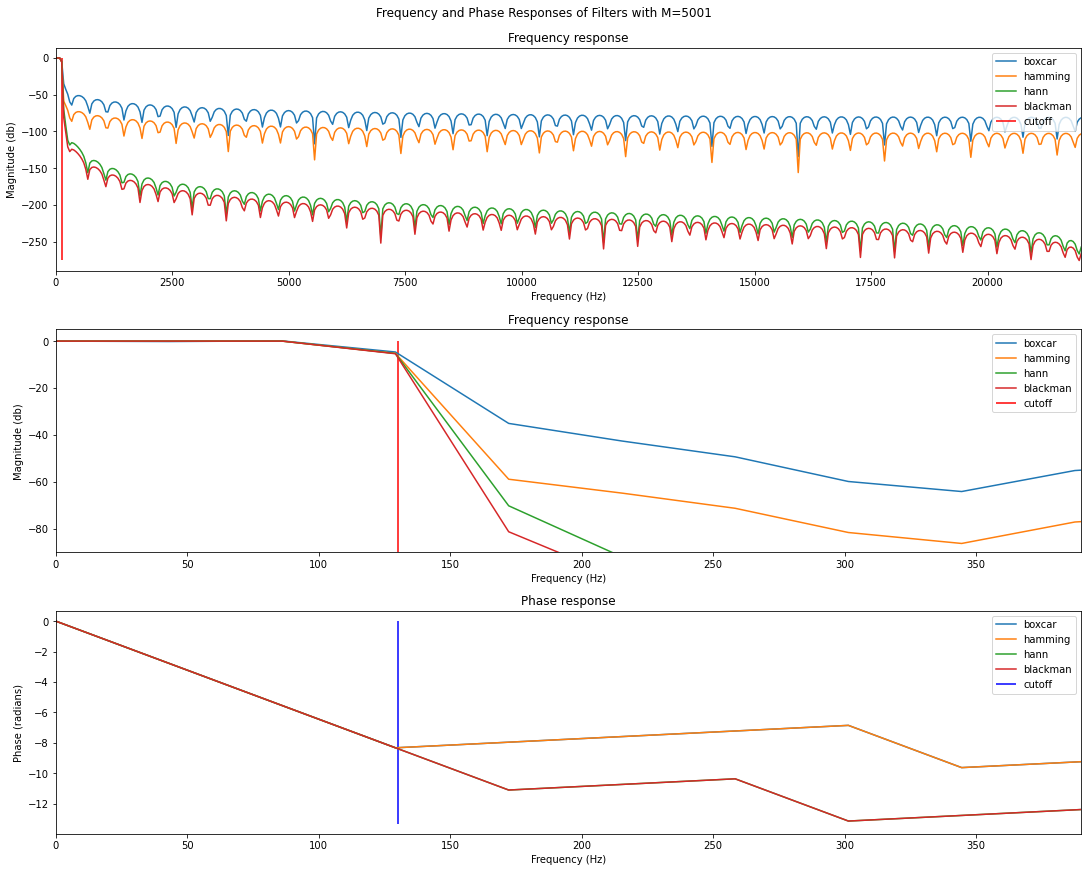

In [3]:
M = 5001
fc = 130
fs = 44100

plot_multiple_filters(M, fc, fs, save='comparison_M{}.jpg'.format(M))

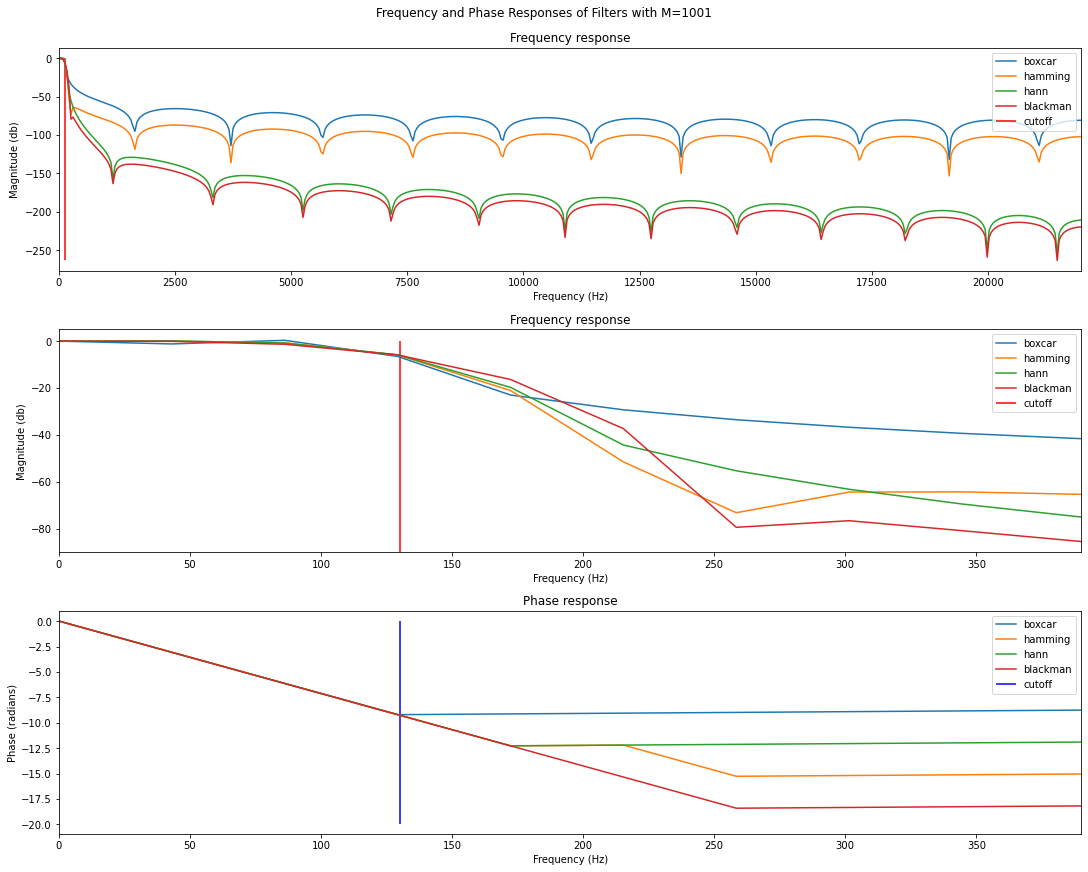

In [4]:
M = 1001
fc = 130

plot_multiple_filters(M, fc, fs, save='comparison_M{}.jpg'.format(M))

In [ ]:
M = 1001
fc = 130
window_type = 'hamming'

plot_single_filter(M, fc, window_type, fs, save='')

In [ ]:
fig, ax = plt.subplots(figsize=(15,8), constrained_layout=True)

fig.suptitle('Frequency Response of {} Windows'.format(window_type))

ax.plot(f1, h_dB1, color='b', label=str(M1), linewidth=1)
ax.plot(f2, h_dB2, color='r', label=str(M2), linewidth=1)
ax.plot(f3, h_dB3, color='g', label=str(M3), linewidth=1)
ax.plot(f4, h_dB4, color='m', label=str(M4), linewidth=1)

ax.vlines(130, -120, 0, label='130Hz')
ax.vlines(fc, -120, 0, label='Cutoff')
#ax.set_title('Half')
ax.set_ylabel('Magnitude (db)')
ax.set_xlabel('Frequency (Hz)')
ax.set_xlim([0.0, 1000])
ax.set_ylim([-90, 1])
ax.legend(loc=1, fontsize=12)

plt.show()

ax[0].plot(w1/max(w1), h_dB1, color='b', label=str(M1), linewidth=1)
ax[0].plot(w2/max(w2), h_dB2, color='r', label=str(M2), linewidth=1)
ax[0].plot(w3/max(w3), h_dB3, color='g', label=str(M3), linewidth=1)
ax[0].plot(w4/max(w4), h_dB4, color='m', label=str(M4), linewidth=1)

ax[2].set_xlabel('Normalized Frequency (pi rad/sample)')

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(15,12), constrained_layout=True)

fig.suptitle('Frequency Response of {} Windows'.format(window_type))

ax[0].plot(f1, h_dB1, color='b', label=str(M1), linewidth=1)
ax[0].plot(f2, h_dB2, color='r', label=str(M2), linewidth=1)
ax[0].plot(f3, h_dB3, color='g', label=str(M3), linewidth=1)
ax[0].plot(f4, h_dB4, color='m', label=str(M4), linewidth=1)
ax[0].vlines(130, -9, 0, label='cutoff freq')
ax[0].vlines(fc, -9, 0, label='cutoff freq')
ax[0].set_title('Close Up')
ax[0].set_ylabel('Magnitude (db)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_xlim([0.0, 3*fc])
ax[0].set_ylim([-9, 1])
ax[0].legend(loc=1, fontsize=12)

ax[1].plot(f1, h_dB1, color='b', label=str(M1), linewidth=1)
ax[1].plot(f2, h_dB2, color='r', label=str(M2), linewidth=1)
ax[1].plot(f3, h_dB3, color='g', label=str(M3), linewidth=1)
ax[1].plot(f4, h_dB4, color='m', label=str(M4), linewidth=1)
ax[1].vlines(130, -9, 0, label='cutoff freq')
ax[1].vlines(fc, -120, 0, label='cutoff freq')
ax[1].set_title('Half')
ax[1].set_ylabel('Magnitude (db)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_xlim([0.0, 1000])
ax[1].set_ylim([-90, 1])
ax[1].legend(loc=1, fontsize=12)

ax[2].plot(f1, h_dB1, color='b', label=str(M1), linewidth=1)
ax[2].plot(f2, h_dB2, color='r', label=str(M2), linewidth=1)
ax[2].plot(f3, h_dB3, color='g', label=str(M3), linewidth=1)
ax[2].plot(f4, h_dB4, color='m', label=str(M4), linewidth=1)
ax[2].vlines(130, -9, 0, label='cutoff freq')
ax[2].vlines(fc, -120, 0, label='cutoff freq')
ax[2].set_title('Complete')
ax[2].set_ylabel('Magnitude (db)')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_xlim([0.0, max(f4)])
ax[2].set_ylim([-120, 1])
ax[2].legend(loc=1, fontsize=12)

#plt.savefig('{}_hz.jpg'.format(window_type))
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(15,12), constrained_layout=True)

fig.suptitle('Frequency Response of {} Windows'.format(window_type))

ax[0].plot(f1, h_dB1, color='b', label=str(M1), linewidth=1)
ax[0].plot(f2, h_dB2, color='r', label=str(M2), linewidth=1)
ax[0].plot(f3, h_dB3, color='g', label=str(M3), linewidth=1)
ax[0].plot(f4, h_dB4, color='m', label=str(M4), linewidth=1)
ax[0].vlines(fc, -9, 0, label='cutoff freq')
ax[0].set_title('Close Up')
ax[0].set_ylabel('Magnitude (db)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_xlim([0.0, 3*fc])
ax[0].set_ylim([-9, 1])
ax[0].legend(loc=1, fontsize=12)

ax[1].plot(f1, h_dB1, color='b', label=str(M1), linewidth=1)
ax[1].plot(f2, h_dB2, color='r', label=str(M2), linewidth=1)
ax[1].plot(f3, h_dB3, color='g', label=str(M3), linewidth=1)
ax[1].plot(f4, h_dB4, color='m', label=str(M4), linewidth=1)
ax[1].vlines(fc, -120, 0, label='cutoff freq')
ax[1].set_title('Half')
ax[1].set_ylabel('Magnitude (db)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_xlim([0.0, 1000])
ax[1].set_ylim([-90, 1])
ax[1].legend(loc=1, fontsize=12)

ax[2].plot(f1, h_dB1, color='b', label=str(M1), linewidth=1)
ax[2].plot(f2, h_dB2, color='r', label=str(M2), linewidth=1)
ax[2].plot(f3, h_dB3, color='g', label=str(M3), linewidth=1)
ax[2].plot(f4, h_dB4, color='m', label=str(M4), linewidth=1)
ax[2].vlines(fc, -120, 0, label='cutoff freq')
ax[2].set_title('Complete')
ax[2].set_ylabel('Magnitude (db)')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_xlim([0.0, max(f4)])
ax[2].set_ylim([-120, 1])
ax[2].legend(loc=1, fontsize=12)

#plt.savefig('{}_hz.jpg'.format(window_type))
plt.show()

## Multiple Window Types

In [ ]:
M = 171

window_type1 = 'boxcar'
window_type2 = 'hamming'
window_type3 = 'hann'
window_type4 = 'blackman'
window_type5 = 'bartlett'

w1, h_dB1 = filter_for_plotting(M, wc, window_type1 , fs)
w2, h_dB2 = filter_for_plotting(M, wc, window_type2, fs)
w3, h_dB3 = filter_for_plotting(M, wc, window_type3, fs)
w4, h_dB4 = filter_for_plotting(M, wc, window_type4, fs)
w5, h_dB5 = filter_for_plotting(M, wc, window_type5, fs)

plt.phase_spectrum(b4)

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(15,12), constrained_layout=True)

fig.suptitle('Frequency Response of Various Windows (M={})'.format(M))

ax[0].plot(w1/max(w1), h_dB1, color='b', label=window_type1, linewidth=1)
ax[0].plot(w2/max(w2), h_dB2, color='r', label=window_type2, linewidth=1)
ax[0].plot(w3/max(w3), h_dB3, color='g', label=window_type3, linewidth=1)
ax[0].plot(w4/max(w4), h_dB4, color='m', label=window_type4, linewidth=1)
ax[0].plot(w4/max(w4), h_dB5, color='c', label=window_type5, linewidth=1)
ax[0].vlines(wc, -140, 0, label='cutoff')
ax[0].set_title('Close Up')
ax[0].set_ylabel('Magnitude (db)')
ax[0].set_xlabel('Normalized Frequency (pi rad/sample)')
ax[0].set_xlim([0.0, 0.0125])
ax[0].set_ylim([-5, 1])
ax[0].legend(loc=1)

ax[1].plot(w1/max(w1), h_dB1, color='b', label=window_type1, linewidth=1)
ax[1].plot(w2/max(w2), h_dB2, color='r', label=window_type2, linewidth=1)
ax[1].plot(w3/max(w3), h_dB3, color='g', label=window_type3, linewidth=1)
ax[1].plot(w4/max(w4), h_dB4, color='m', label=window_type4, linewidth=1)
ax[1].plot(w4/max(w4), h_dB5, color='c', label=window_type5, linewidth=1)
ax[1].set_title('Half')
ax[1].vlines(wc, -120, 0, label='cutoff')
ax[1].set_ylabel('Magnitude (db)')
ax[1].set_xlabel('Normalized Frequency (pi rad/sample)')
ax[1].set_xlim([0.0, 0.1])
ax[1].set_ylim([-90, 1])
ax[1].legend(loc=1)

ax[2].plot(w1/max(w1), h_dB1, color='b', label=window_type1, linewidth=1)
ax[2].plot(w2/max(w2), h_dB2, color='r', label=window_type2, linewidth=1)
ax[2].plot(w3/max(w3), h_dB3, color='g', label=window_type3, linewidth=1)
ax[2].plot(w4/max(w4), h_dB4, color='m', label=window_type4, linewidth=1)
ax[2].plot(w4/max(w4), h_dB5, color='c', label=window_type5, linewidth=1)
ax[2].set_title('Complete')
ax[2].vlines(wc, -120, 0, label='cutoff')
ax[2].set_ylabel('Magnitude (db)')
ax[2].set_xlabel('Normalized Frequency (pi rad/sample)')
ax[2].set_xlim([0.0, 1.0])
ax[2].set_ylim([-120, 1])
ax[2].legend(loc=1)

plt.savefig('Comparison_M{}.jpg'.format(M))
plt.show()

## Single Filter

In [ ]:
window_type = 'boxcar'
M = 171
w, h_dB, h_Phase = filter_for_plotting(M, wc, window_type, fs)

In [ ]:
window_type = 'boxcar'
M = 171

fs = 44100
fc = 150

wc = fc / (fs/2)

plot_single_filter(window_type, M, wc, fs, save='boxcar.jpg')